# Import necessary libraries

In [3]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

### Q1. Predict delivery time using sorting time.

# Import data

In [84]:
time = pd.read_csv('4.delivery_time.csv')
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [85]:
# Renaming Columns
time=time.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [86]:
time.shape

(21, 2)

In [87]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [88]:
time.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [89]:
time.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

In [90]:
time.duplicated().sum()

0

In [91]:
time.describe(include='all')

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [92]:
print(kurtosis(time.delivery_time))
print(kurtosis(time.sorting_time))

-0.02558576894549036
-1.1653901357029155


In [93]:
print(skew(time.delivery_time))
print(skew(time.sorting_time))

0.326702631656106
0.043680994983108075


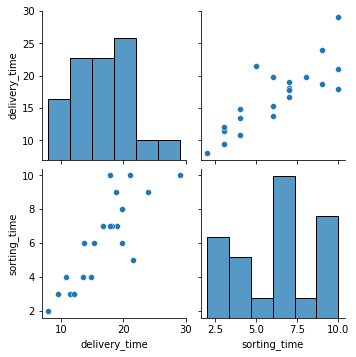

In [94]:
sns.pairplot(time)
plt.show()

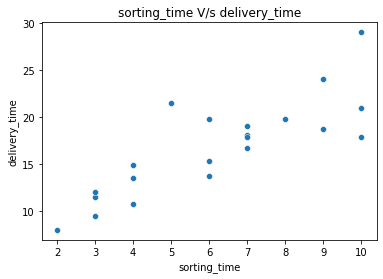

In [95]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=time)
plt.title('sorting_time V/s delivery_time')
plt.show()

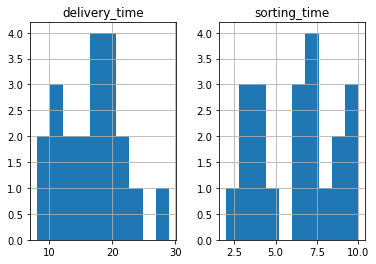

In [96]:
time.hist()
plt.show()

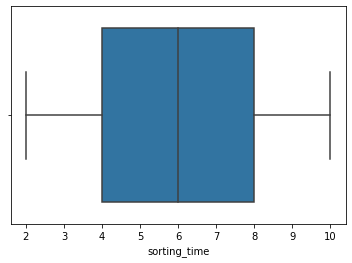

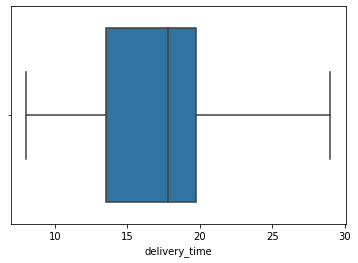

In [97]:
sns.boxplot(time['sorting_time'])
plt.show()
sns.boxplot(time['delivery_time'])
plt.show()

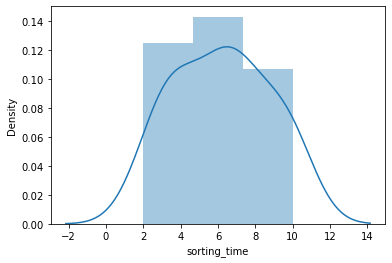

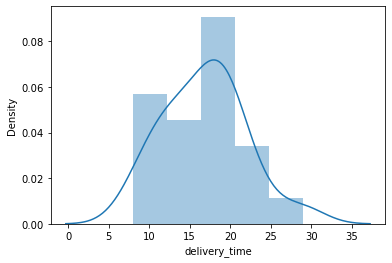

In [98]:
sns.distplot(time['sorting_time'])
plt.show()
sns.distplot(time['delivery_time'])
plt.show()

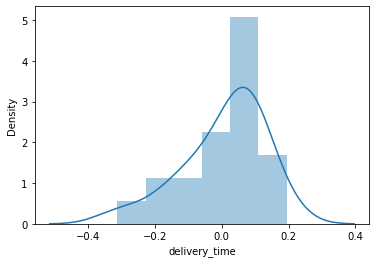

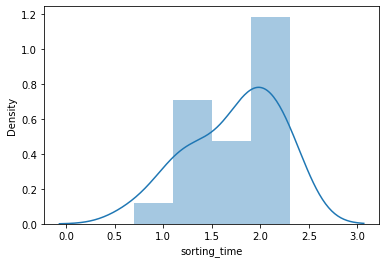

In [40]:
time['delivery_time'] = np.log(time['delivery_time'])
sns.distplot(time['delivery_time'])
plt.show()
time['sorting_time'] = np.log(time['sorting_time'])
sns.distplot(time['sorting_time'])
plt.show()

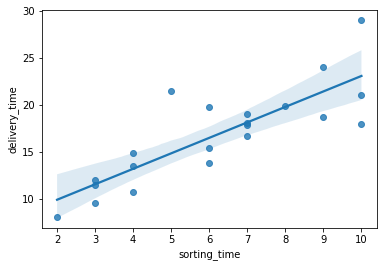

In [99]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'])
plt.show()

# correlation

In [101]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


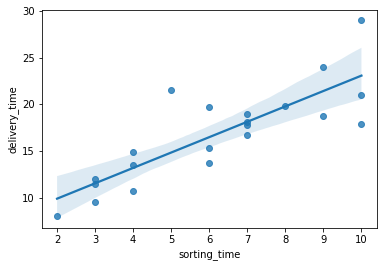

In [102]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'])
plt.show()

# Model building

In [103]:
time_new = smf.ols('delivery_time~sorting_time',data=time).fit()
time_new

# Model testing

In [104]:
time_new.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [105]:
time_new.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [106]:
time_new.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [107]:
time_new.rsquared

0.6822714748417231

In [109]:
time['Expected']=time_new.fittedvalues
time['Error']=time_new.resid
time

,delivery_time,sorting_time,Expected,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [110]:
time['Error_sq']=time['Error']**2
time

,delivery_time,sorting_time,Expected,Error,Error_sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [111]:
time_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        14:01:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [21]:
# Predict for 8,15,29 daily circulation
delivery_time = (6.582734)+(1.649020)*8
print(delivery_time)
delivery_time = (6.582734)+(1.649020)*15
print(delivery_time)
delivery_time = (6.582734)+(1.649020)*29
print(delivery_time)

19.774894
31.318033999999997
54.404314


In [112]:
newdata = pd.Series([8,15,29])
newdata

0     8
1    15
2    29
dtype: int64

In [113]:
data_pred = pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,15
2,29


In [114]:
prediction = time_new.predict(data_pred)
prediction

0    19.774893
1    31.318032
2    54.404311
dtype: float64

In [115]:
prediction = {'sorting_time': [8,15,29], 'delivery_time': [19.774893,31.318032,54.404311]}
prediction = pd.DataFrame(data=prediction)
prediction

,sorting_time,delivery_time
0,8,19.774893
1,15,31.318032
2,29,54.404311


## =========================================================================

### Q2. Build a prediction model for Salary_hike

# Import data

In [71]:
salary_data = pd.read_csv('4.Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [28]:
salary_data.shape

(30, 2)

In [29]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
salary_data.duplicated().sum()

0

In [34]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [35]:
salary_data.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [36]:
print(kurtosis(salary_data.Salary))
print(kurtosis(salary_data.YearsExperience))

-1.2829125042427751
-1.0447521989892943


In [37]:
print(skew(salary_data.Salary))
print(skew(salary_data.YearsExperience))

0.3361618825592921
0.3603123252525561


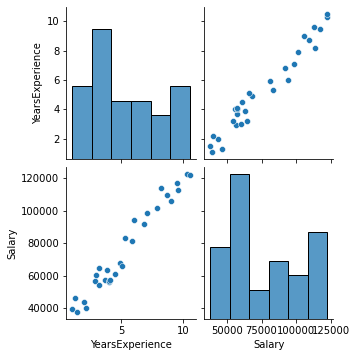

In [39]:
sns.pairplot(salary_data)
plt.show()

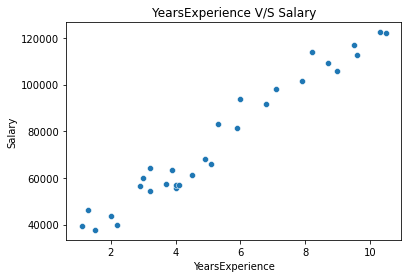

In [41]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience V/S Salary')
plt.show()

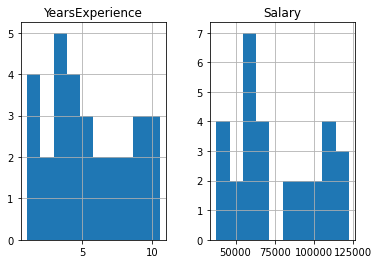

In [40]:
salary_data.hist()
plt.show()

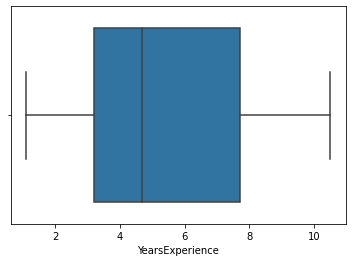

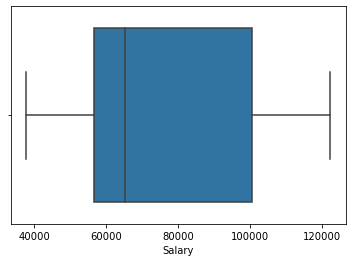

In [43]:
sns.boxplot(salary_data['YearsExperience'])
plt.show()
sns.boxplot(salary_data['Salary'])
plt.show()

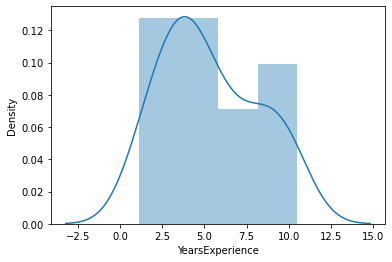

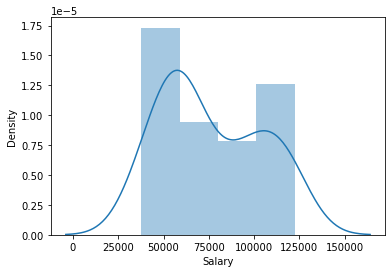

In [44]:
sns.distplot(salary_data['YearsExperience'])
plt.show()
sns.distplot(salary_data['Salary'])
plt.show()

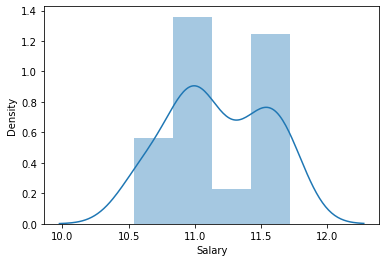

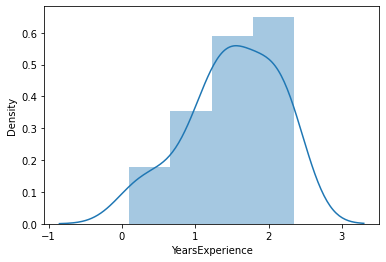

In [45]:
salary_data['Salary'] = np.log(salary_data['Salary'])
sns.distplot(salary_data['Salary'])
plt.show()
salary_data['YearsExperience'] = np.log(salary_data['YearsExperience'])
sns.distplot(salary_data['YearsExperience'])
plt.show()

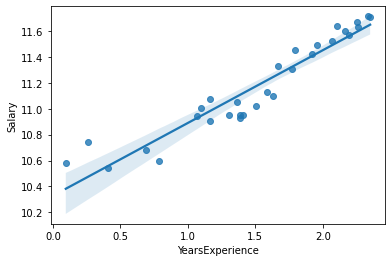

In [46]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])
plt.show()

# Correlation

In [72]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model building

In [73]:
salary_new = smf.ols("Salary~YearsExperience",data=salary_data).fit()
salary_new

# Model Testing

In [74]:
salary_new.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [75]:
salary_new.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [76]:
salary_new.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [77]:
salary_new.rsquared

0.9569566641435086

In [63]:
salary_data['Expected']=salary_new.fittedvalues
salary_data['Errors']=salary_new.resid
salary_data['Error_sq']=salary_data['Errors']**2
salary_data

,YearsExperience,Salary,Expected,Errors,Error_sq
0,0.095310,10.580073,10.381616,0.198457,0.039385
1,0.262364,10.740843,10.475515,0.265328,0.070399
2,0.405465,10.538237,10.555951,-0.017713,0.000314
3,0.693147,10.681091,10.717653,-0.036563,0.001337
4,0.788457,10.593906,10.771226,-0.177320,0.031442
5,1.064711,10.944506,10.926505,0.018001,0.000324
6,1.098612,11.004597,10.945561,0.059036,0.003485
7,1.163151,10.904946,10.981837,-0.076891,0.005912
8,1.163151,11.073567,10.981837,0.091730,0.008414
9,1.308333,10.954117,11.063442,-0.109326,0.011952


In [78]:
salary_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        13:58:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [83]:
#predict for 2,4,7 years
salary = 9449.9623*2 + 2.579e+04
print(salary)
salary = 9449.9623*4 + 2.579e+04
print(salary)
salary = 9449.9623*7 + 2.579e+04
print(salary)

44689.9246
63589.8492
91939.7361


In [79]:
new_experience = pd.Series([2,4,7])
new_experience

0    2
1    4
2    7
dtype: int64

In [80]:
salary_pred = pd.DataFrame(new_experience,columns=['YearsExperience'])
salary_pred

,YearsExperience
0,2
1,4
2,7


In [81]:
salary_new.predict(salary_pred)

0    44692.124842
1    63592.049484
2    91941.936449
dtype: float64

In [82]:
prediction = {'YearsExperience': [2,4,7], 'Salary': [44692.124842,63592.049484,91941.936449]}
prediction = pd.DataFrame(data=prediction)
prediction

,YearsExperience,Salary
0,2,44692.124842
1,4,63592.049484
2,7,91941.936449
